In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
matches = pd.read_csv('./dataset/atp_matches_till_2022.csv')
players = pd.read_csv('./dataset/atp_players_till_2022.csv')
rankings = pd.read_csv('./dataset/atp_rankings_till_2022.csv')

In [3]:
print(matches.keys())
print(players.keys())
print(rankings.keys())
matches.head()

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')
Index(['player_id', 'name_first', 'name_last', 'hand', 'dob', 'ioc', 'height',
       'wikidata_id'],
      dtype='object')
Index(['ranking_date', 'rank', 'player', 'points'], dtype='object')


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1968-2029,Dublin,Grass,32,A,19680708,270,112411,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1968-2029,Dublin,Grass,32,A,19680708,271,126914,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1968-2029,Dublin,Grass,32,A,19680708,272,209523,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1968-2029,Dublin,Grass,32,A,19680708,273,100084,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1968-2029,Dublin,Grass,32,A,19680708,274,100132,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Cleaning the data.... 
matches_dropset = ['tourney_name', 'surface', 'draw_size', 'winner_seed', 'winner_entry',
       'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age', 'loser_seed', 'loser_entry', 'loser_hand', 'loser_ht', 
       'loser_ioc', 'loser_age', 'winner_rank_points', 'loser_rank_points', 'round','minutes', 'w_ace', 'w_df', 
       'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'winner_rank', 'loser_rank']
try:
       matches.drop(matches_dropset,inplace=True,axis=1)
except Exception as e:
       print("Keys not found")

# check if identifier is unique (can be used as primary key)
primary_keys = []
for k in matches.keys():
       if matches[k].is_unique:
              primary_keys.append(k)
print('All keys', matches.keys())
print('Primary keys',primary_keys)
matches.loc[20]


All keys Index(['tourney_id', 'tourney_level', 'tourney_date', 'match_num', 'winner_id',
       'winner_name', 'loser_id', 'loser_name', 'score', 'best_of'],
      dtype='object')
Primary keys []


tourney_id          1968-2029
tourney_level               A
tourney_date         19680708
match_num                 290
winner_id              109813
winner_name      Ken Fletcher
loser_id               209523
loser_name       Cecil Pedlow
score                 6-1 6-0
best_of                     3
Name: 20, dtype: object

In [5]:
md = matches.to_dict()
data = {}
for i in md['tourney_id'].keys():
    data[md['tourney_date'][i]*1000 + md['match_num'][i]] = md
dataset = pd.DataFrame.from_dict(md)
primary_keys = []
for k in dataset.keys():
       if dataset[k].is_unique:
              primary_keys.append(k)
print('All keys', dataset.keys())
print('Primary keys',primary_keys)
dataset


All keys Index(['tourney_id', 'tourney_level', 'tourney_date', 'match_num', 'winner_id',
       'winner_name', 'loser_id', 'loser_name', 'score', 'best_of',
       'primary_key'],
      dtype='object')
Primary keys []


,tourney_id,tourney_level,tourney_date,match_num,winner_id,winner_name,loser_id,loser_name,score,best_of,primary_key
0,1968-2029,A,19680708,270,112411,Douglas Smith,110196,Peter Ledbetter,6-1 7-5,3,"(19680708, 270)"
1,1968-2029,A,19680708,271,126914,Louis Pretorius,209536,Maurice Pollock,6-1 6-1,3,"(19680708, 271)"
2,1968-2029,A,19680708,272,209523,Cecil Pedlow,209535,John Mulvey,6-2 6-2,3,"(19680708, 272)"
3,1968-2029,A,19680708,273,100084,Tom Okker,209534,Unknown Fearmon,6-1 6-1,3,"(19680708, 273)"
4,1968-2029,A,19680708,274,100132,Armistead Neely,209533,Harry Sheridan,6-2 6-4,3,"(19680708, 274)"
...,...,...,...,...,...,...,...,...,...,...,...
188156,2022-M-DC-2022-WG2-PO-GRE-JAM-01,D,20220304,4,209362,Aristotelis Thanos,209080,Blaise Bicknell,6-4 6-4,3,"(20220304, 4)"
188157,2022-M-DC-2022-WG2-PO-GRE-JAM-01,D,20220304,5,202065,Petros Tsitsipas,202120,Rowland Phillips,4-6 6-4 6-4,3,"(20220304, 5)"
188158,2022-M-DC-2022-WG2-PO-HKG-BEN-01,D,20220304,1,138846,Hong Kit Jack Wong,105278,Alexis Klegou,1-6 6-4 4-1 RET,3,"(20220304, 1)"
188159,2022-M-DC-2022-WG2-PO-HKG-BEN-01,D,20220304,2,209409,Coleman Wong,200583,Delmas Ntcha,6-4 6-4,3,"(20220304, 2)"


In [71]:
class Player:
    def __init__(self,player_id,player_name):
        self.id = player_id
        self.name = player_name
        self.rating = 1500 # initial Elo rating 
        self.surface_rating = {'hard':1500,'clay':1500,'grass':1500}
        self.matches = []
        self.wins = 0
        self.lose = 0
    
    def updateProfile(self,score:list,result:str,opponent):
        matches.append((opponent.id,score))


# Elo Details

## Penalty for Missing Matches 



In [133]:
from enum import Enum

class EloType(Enum):
    vanilla = 'vanilla'
    continuous = 'continuous'
    temporal_vanilla = 'temporal-vanilla'
    temporal_continuous = 'temporal-continuous'

class Elo:
    def __init__(self,elo_type=EloType.vanilla):
        self.base = 10.0 
        self.const = 400.0 
        self.k = 20
        self.__elo_type = elo_type
    '''
        delta is the rating difference in the current match's performance
    '''
    def predict(self,delta):
        return 1 / (1 + self.base**(delta/self.const))
        

    def vanilla_elo(self,old_ratings, delta, result,time=1):
        ea = 1 / (1 + self.base**(delta/self.const))
        return old_ratings + self.k*(result - ea)

    def elo_rate(self,old_ratings,delta,result,time=1):
        if old_ratings > 2400:
            self.k = 10 
        else:
            self.k = 20
        if self.__elo_type == EloType.vanilla:
            return self.vanilla_elo(old_ratings,delta,result,time)
        

In [134]:
# dataset.loc[20]
dataset.loc[dataset.shape[0]-10]
# dataset.shape[0]

tourney_id       2022-M-DC-2022-WG2-PO-EGY-CYP-01
tourney_level                                   D
tourney_date                             20220304
match_num                                       2
winner_id                                  117365
winner_name                     Petros Chrysochos
loser_id                                   105747
loser_name                  Karim Mohamed Maamoun
score                                     6-3 6-4
best_of                                         3
primary_key                         (20220304, 2)
Name: 188151, dtype: object

In [139]:
players = {}
prat = {}
plerr = {}
eloObj = Elo()

for i in range(dataset.shape[0]):
    pdone = int(100*i/dataset.shape[0])
    # print('\r',pdone,end=' ')
    print('\r[',pdone*'=',(100-pdone)*'-',']',pdone,'\%',sep='',end='')
    mtch = dataset.loc[i]
    if mtch['winner_name'] not in players.keys():
        players[mtch['winner_name']] = Player(mtch['winner_id'],mtch['winner_name'])
        prat[mtch['winner_name']] = [1500]
        plerr[mtch['winner_name']] = [0]
    if mtch['loser_name'] not in players.keys():
        players[mtch['loser_name']] = Player(mtch['loser_id'],mtch['loser_name'])
        prat[mtch['loser_name']] = [1500]
        plerr[mtch['loser_name']] = [0]
    delta = players[mtch['winner_name']].rating - players[mtch['loser_name']].rating
    pred = eloObj.predict(delta)
    plerr[mtch['loser_name']].append(pred)
    plerr[mtch['winner_name']].append(1 - pred)
    players[mtch['winner_name']].rating = eloObj.elo_rate(players[mtch['winner_name']].rating,delta,1)
    players[mtch['winner_name']].wins +=1 
    players[mtch['loser_name']].rating = eloObj.elo_rate(players[mtch['loser_name']].rating,delta,0)
    players[mtch['loser_name']].lose += 1
    prat[mtch['loser_name']].append(players[mtch['loser_name']].rating)
    prat[mtch['winner_name']].append(players[mtch['winner_name']].rating)

[===================================================================================================-]99\%\%=========================---------------------------------------------------------------------------]25\%\%]32\%35\%-----------------------------------------------------------]41\%------------------------------------------------]52\%\%------------------------------]70\%-----]95\%

In [136]:
def plotPlayer(name:str):
    if name not in prat.keys():
        print('ERROR: Name not found')
        return 
    plt.plot(range(len(prat[name])),prat[name],label=name)
    # plt.show()
    return

In [140]:
tosee = {}
for i in prat.keys():
    if len(prat[i]) not in tosee.keys():
        tosee[len(prat[i])] = [] 
    tosee[len(prat[i])].append(i)
print(tosee)
print(tosee.keys())


{9: ['Douglas Smith', 'Jim Buckley', 'Bernd Kube', 'Ernst Blanke', 'John Norgauer', 'Jimmy Parker', 'Jack Waltz', 'Kiril Yashmakov', 'Dennis Breetzke', 'Andre Van Der Merwe B', 'Alfred Schwartz', 'Dave Simmonds', 'Robert Puddicombe', 'Ken Binns', 'Guillermo Oropez', 'Colin Mchugo', 'Geoffrey Olsson', 'Ruby Hoskowetz', 'Khoder Issa', 'Raymundo Deyro', 'Jean Neuman', 'Steve Fiske', 'Alberto Martorell', 'Abdel Ghani Mohammed', 'Kenneth Tsui', 'Andrew Rae', 'Mark Shires', 'Miguel Maurtua', 'Ahmed Ben Omar', 'Olle Palmer', 'Phil Siviter', 'Arif Kocak', 'Trevor Little', 'Kanyab Derafshidjavan', 'Micky Dominguez', 'Dragan Savic', 'Carlos Lando', 'Carlos Alvarado', 'Gerard Toulon', 'Harry Fritz', 'David Imonitie', 'Franco Merlone', 'Jeremy Cohen', 'Famiano Meneschincheri', 'Hans Hansson', 'Gerald Mild', 'Christian Geyer', 'Michele Fioroni', 'Islam Ul Haq', 'Harald Rittersbacher', 'Eduardo Velez', 'Stephen Botfield', 'Sadiq Abdullahi', 'Charlton Eagle', 'Robinson Ureta', 'Antoine Beugre', 'Deni

['Sherwood Stewart', 'John Sadri', 'Daniel Vacek', 'Filippo Volandri']
Sherwood Stewart 169 234
John Sadri 214 189
Daniel Vacek 177 226
Filippo Volandri 178 225


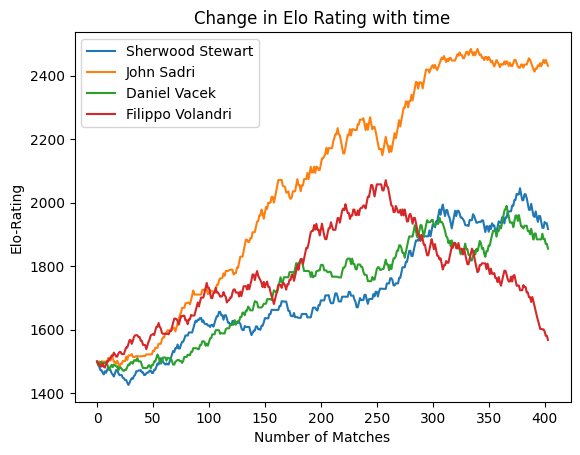

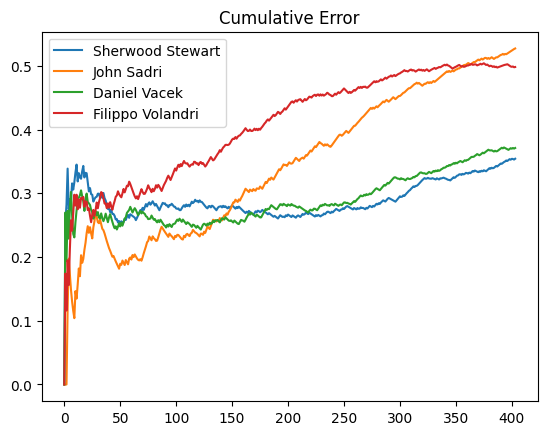

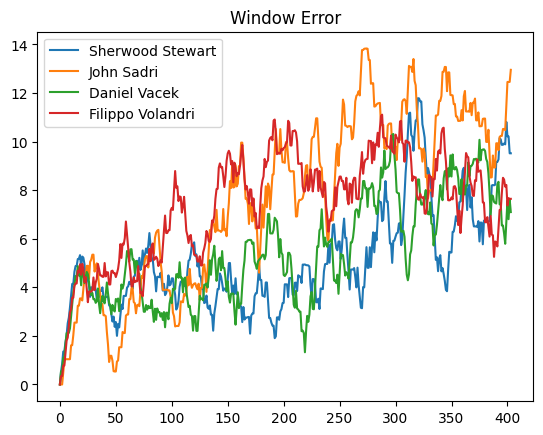

In [142]:
indx = 404

print(tosee[indx])
for i in tosee[indx]:
    print(i,players[i].wins,players[i].lose)
    # plotPlayer(i)
    plt.plot(range(len(prat[i])),prat[i],label=i)
plt.title('Change in Elo Rating with time')
plt.xlabel('Number of Matches')
plt.ylabel('Elo-Rating')
plt.legend()
plt.show()
# cumulative error 
for i in tosee[indx]:
    # plotPlayer(i)
    nmat = []
    for x in plerr[i]:
        if len(nmat) == 0:
            nmat.append(x)
        else:
            nmat.append((x+nmat[-1]*len(nmat))/(len(nmat) + 1))
    plt.plot(range(len(nmat)),nmat,label=i)
plt.title('Cumulative Error')
plt.legend()
plt.show()


# window error  
window_size = 15 
for i in tosee[indx]:
    # plotPlayer(i)
    nmat = []
    for x in range(len(plerr[i])):
        if x < window_size:
            y = 0
            ans = 0
            while y <= x:
                ans += plerr[i][y]
                y += 1
            nmat.append(ans)
        else:
            ans = 0
            y = 0 
            while y < window_size:
                y += 1
                ans += plerr[i][x - y]
            nmat.append(ans)
    plt.plot(range(len(nmat)),nmat,label=i)
plt.title('Window Error')
plt.legend()
plt.show()




In [143]:
for i in range(dataset.shape[0]):
    mtch = dataset.loc[i]
    if mtch['winner_name'] == 'John Sadri':
        print(mtch['tourney_date'],'won') 
    if mtch['loser_name'] == 'John Sadri':
        print(mtch['tourney_date'],'lost') 

19760808 lost
19770419 lost
19780820 lost
19781029 won
19781029 lost
19781224 won
19781224 lost
19780723 lost
19781106 lost
19780829 won
19780829 won
19780829 lost
19781226 won
19781226 won
19781226 lost
19780731 lost
19790723 lost
19790102 won
19790102 lost
19790611 lost
19791022 won
19791022 won
19791022 won
19791022 won
19791022 lost
19791112 won
19791112 lost
19791105 won
19791105 won
19791105 lost
19791217 won
19791217 lost
19790416 lost
19790122 lost
19790212 won
19790212 lost
19790714 lost
19790820 won
19790820 lost
19790917 lost
19790924 won
19790924 lost
19791030 won
19791030 won
19791030 won
19791030 lost
19790625 won
19790625 won
19790625 lost
19790828 won
19790828 lost
19791224 won
19791224 won
19791224 won
19791224 won
19791224 won
19791224 lost
19790129 won
19790129 won
19790129 lost
19790729 won
19790729 lost
19790409 won
19790409 lost
19790319 lost
19790326 lost
19790115 won
19790115 won
19790115 lost
19800408 lost
19800101 won
19800101 won
19800101 won
19800101 won
198